# 🍿Analiza danych platformy Netflix
**Autor:** Artur Rapacz                                                                                                                                
**Cel:** Analiza danych o filmach i serialach Netflix przy użyciu Pandas

In [122]:
# Import bibliotek potrzebnych do analizy
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [123]:
#Używane funkcje
def absolute_value(values):
    def autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return autopct

In [124]:
# Wczytywanie danych
df = pd.read_csv('./data/netflix_titles.csv', usecols=['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'duration', 'listed_in'],
                                                index_col='show_id')
df.head()

,type,title,director,country,date_added,release_year,duration,listed_in
show_id,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,90 min,Documentaries
s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,1 Season,"Docuseries, Reality TV"
s5,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [125]:
#Informacje o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   country       7976 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8807 non-null   int64 
 6   duration      8804 non-null   object
 7   listed_in     8807 non-null   object
dtypes: int64(1), object(7)
memory usage: 619.2+ KB


In [126]:
#Liczba brakujących danych w każdej kolumnie
df.isnull().sum()

type               0
title              0
director        2634
country          831
date_added        10
release_year       0
duration           3
listed_in          0
dtype: int64

In [127]:
#Uzupełnianie brakujących danych
df["director"] = df['director'].fillna("Unknown")
df["country"] = df['country'].fillna("Unknown")
df["duration"] = df['duration'].fillna("Unknown")

<Axes: title={'center': 'Liczba filmów i seriali na platformie'}>

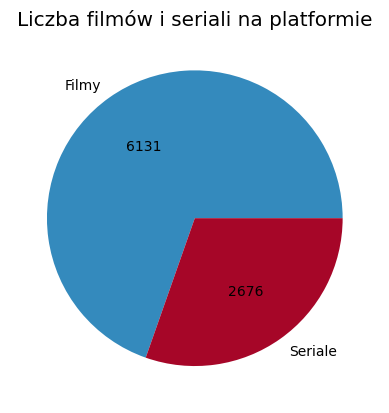

In [128]:
#Liczba filmów i seriali na platformie
typeQuantity = df['type'].value_counts()
typeQuantity.plot(kind='pie', title='Liczba filmów i seriali na platformie', ylabel="", labels=['Filmy', 'Seriale'],
                  autopct=absolute_value(typeQuantity.values))

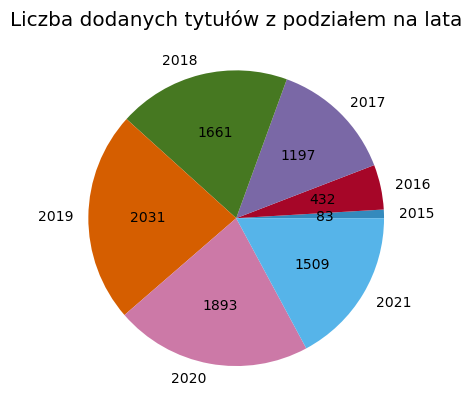

In [129]:
#Liczba dodanych tytułów z podziałem na lata.
df['date_added'] = pd.to_datetime(df['date_added'], format="mixed")
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].fillna(0)
df['year_added'] = df['year_added'].astype(int)
yearQuantity = df['year_added'].value_counts().sort_index()
yearQuantity[8:].plot(kind='pie', title='Liczba dodanych tytułów z podziałem na lata', ylabel='', autopct=absolute_value(yearQuantity.values))
plt.show()


<Axes: title={'center': 'Najczęstsze kraje produkcji (TOP 10)'}, xlabel='Kraj', ylabel='Liczba produkcji'>

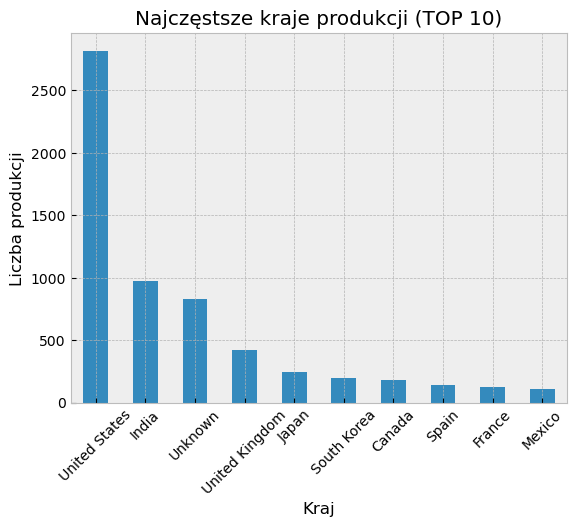

In [130]:
#Najczęstsze kraje produkcji (TOP 10)
countryQuantity = df['country'].value_counts().head(10)
countryQuantity

countryQuantity.plot(kind='bar', rot=45, title = 'Najczęstsze kraje produkcji (TOP 10)', ylabel='Liczba produkcji', xlabel='Kraj')

<Axes: title={'center': 'Liczba sezonów'}, xlabel='Liczba sezonów', ylabel='Liczba seriali'>

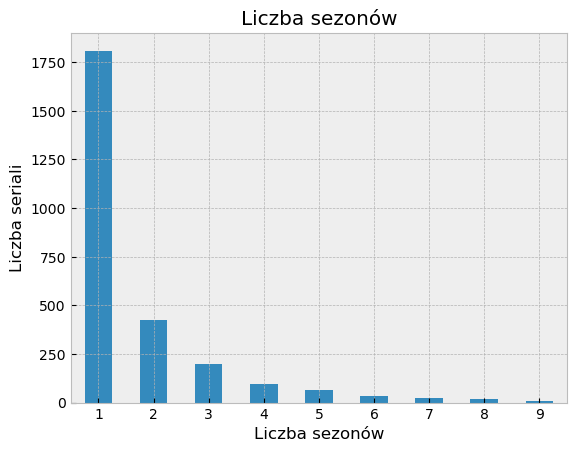

In [131]:
#Liczba sezonów
TVShowFilter = df['type'] == 'TV Show'
df[TVShowFilter]['duration'].head(20)
seasonQuantity = df[TVShowFilter]['duration'].str[0].value_counts().sort_index()
seasonQuantity.plot(kind='bar', rot=0, ylabel='Liczba seriali', xlabel='Liczba sezonów', title='Liczba sezonów')

<Axes: title={'center': 'Najpopularniejsze gatunki (TOP10)'}, xlabel='Gatunki', ylabel='Liczba produkcji'>

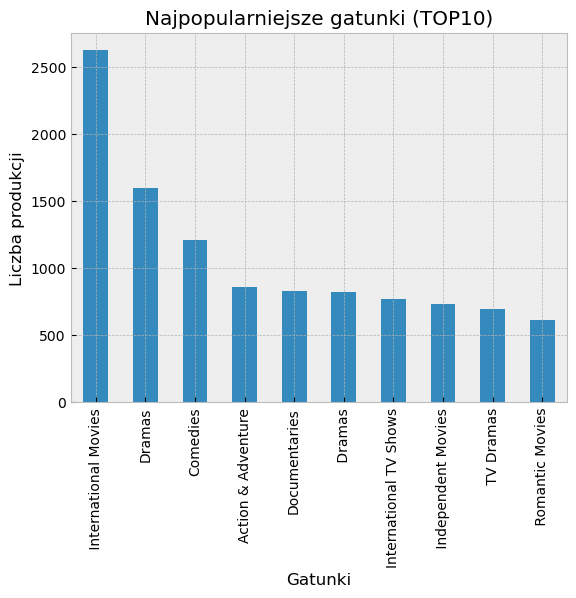

In [146]:
#Najpopularniejsze gatunki (TOP10)
movieCategory = df['listed_in'].str.split(',', expand=True).stack().value_counts()
movieCategory[:10].plot(kind='bar', xlabel='Gatunki', ylabel='Liczba produkcji', title='Najpopularniejsze gatunki (TOP10)')

## Wnioski
Na podstawie powyższej analizy możemy stwierdzić, że na platformie netflix pod względem liczby nad serialami dominują filmy w stosunku 70% do 30% na korzyść filmów. Najwięcej produkcji pochodzi ze Stanów Zjednoczonych i Indii, ze znaczną dominacją USA, a platforma z roku na rok dodaje coraz więcej produkcji.
Z przedstawionych danych można też wyczytać, że zdecydowana większość seriali kończy się na pierwszym sezonie, z wyraźnym spadkiem ilości kontynuuowanych seriali z każdym sezonem, gdzie spośród ok. 3000 pozycji jedynie 17 zakończyło się na ośmiu sezonach, a 9 na dziewięciu sezonach.
Wśród najpopularniejszych kategorii prym wiodą filmy zagraniczne, dramaty oraz komedie.